<a href="https://colab.research.google.com/github/mfcortes/diplomadoCienciaDatos/blob/main/src/markovcovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>Actividad 1</font>
Escenario 1: Tasa de contagio alta

Se tienen los siguientes valores para los parámetros del modelo: $s_l=0.30$, $l_g=0.10$, $l_r=0.20$, $g_r=0.10$ y $g_f=0.10$.

1. Implmente el modelo epidemiológico básico mediante una función en Python.

2. Grafique los resultados de su modelo para mostrar como evoluciona la epidemia de Covid19 para un periodo de 60 días.

3. Entregue los resultados para la evolución de la enfermedad en la primera semana de análisis.

4. Para el último día de la ventana de estudio, calcule la cantidad de individuos recuperados y fallecidos.

### 1.1) Modelo epidemiológico.

Se implementó una clase markovCovid: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class markovCovid():
  def __init__(self,POB,SL,LG,LR,GR,GF,CAMAS):
    self.camas = CAMAS
    self.primerEvento = True
    self.DIAS = 0
    self.POB = POB
    self.SL = SL
    self.LG = LG
    self.LR = LR
    self.GR = GR
    self.GF = GF
    self.PlotGS = []
    self.PlotGL = []
    self.PlotGR = []
    self.PlotGG = []
    self.PlotGF = []
    self.PlotCamas = []
    self.generaMTrancicion()

    # Vector Inicial
    self.V0= self.POB*np.array([[1,0,0,0,0]])

  def generaMTrancicion(self):
    RR = 1;FF = 1;LS = 0;LF = 0;RS = 0;RL = 0;SR = 0;SG = 0;SF = 0;RF = 0;RG = 0;GS = 0;GL = 0
    FS = 0;FL = 0;FR = 0;FG = 0;FF = 1
    SS = 1 - self.SL
    LL = 1 - self.LR - self.LG
    GG = 1 - self.GR - self.GF
    MT = np.array([])
    # Definimos la matriz A
    self.A = np.array([[SS, self.SL, SR, SG, SF],
                [LS,LL,self.LR,self.LG,LF],
                [RS, RL, RR, RG, RF ],
                [GS, GL, self.GR, GG, self.GF ],
                [FS, FL, FR, FG,FF ]])
    print(f'Probabilidades :\ns_l={self.SL}\nl_g={self.LG}\nl_r={self.LR}\ng_r={self.GR}\ng_f={self.GF}\n')
    print(f'Matriz de transición') 
    print(self.A)

  def graficar(self):
    plt.plot([j for j in self.PlotGS], label="Sanos")
    plt.plot([j for j in self.PlotGL], label="Síntomas leves")
    plt.plot([j for j in self.PlotGG], label="Síntomas graves")
    plt.plot([j for j in self.PlotGR], label="Recuperados")
    plt.plot([j for j in self.PlotGF], label="Fallecidos")
    plt.title(f'Evolución de la enfermedad para probabilidad de contagio= {self.SL*100}%')
    plt.legend()


  def graficoSanos(self,DIAS):
    plt.plot([j for j in self.PlotGS], label="Sanos")
    plt.plot([j for j in self.PlotCamas], label="Camas Disponibles")
    plt.title(f'Personas Sanas vs Camas Disponibles : día {DIA} para probabilidad de contagio= {self.SL*100}%')
    plt.legend()


  def graficoLeves(self,DIAS):
    plt.plot([j for j in self.PlotGL], label="Síntomas leves")
    plt.plot([j for j in self.PlotCamas], label="Camas Disponibles")
    plt.title(f'Personas enfermas leves vs Camas Disponibles :  día {DIA} para probabilidad de contagio= {self.SL*100}%')
    plt.legend()

  
  def graficoGraves(self,DIAS):
    plt.plot([j for j in self.PlotGG], label="Síntomas graves")
    plt.plot([j for j in self.PlotCamas], label="Camas Disponibles")
    plt.title(f'Personas enfermas graves vs Camas Disponibles : día {DIA}  para probabilidad de contagio= {self.SL*100}%')
    plt.legend()
 
  
  def graficoFallecidos(self,DIAS):
    plt.plot([j for j in self.PlotGF], label="Fallecidos")
    plt.plot([j for j in self.PlotCamas], label="Camas Disponibles")
    plt.title(f'Personas Fallecidas vs Camas Disponibles , día {DIA} para probabilidad de contagio= {self.SL*100}%')
    plt.legend()

  

  def  resultadosSanos(self,DIAS):
    Estado = (self.V0 @ np.linalg.matrix_power(self.A,DIAS))
    sanos = Estado[0][0]
    return sanos
  
  def  resultadosLeves(self,DIAS):
    Estado = (self.V0 @ np.linalg.matrix_power(self.A,DIAS))
    leves = Estado[0][1]
    return leves
  
  def  resultadosGraves(self,DIAS):
    Estado = (self.V0 @ np.linalg.matrix_power(self.A,DIAS))
    graves = Estado[0][3]
    return graves

  def  resultadosRecuperados(self,DIAS):
    Estado = (self.V0 @ np.linalg.matrix_power(self.A,DIAS))
    recuperados = Estado[0][2]
    return recuperados
  
  def  resultadosFallecidos(self,DIAS):
    Estado = (self.V0 @ np.linalg.matrix_power(self.A,DIAS))
    fallecidos = Estado[0][4]
    return fallecidos
    
  def DiaColapso(self):
    if (self.colapso == self.DIAS):
      print(f'Camas Disponibles, el sistema para un Contagio {self.SL*100}% No colapsa')
    else:
      print(f'Camas Disponibles, el sistema para un Contagio {self.SL*100}% colapsa en el día : {self.colapso}') 
      
  def modMarkovCovid(self,DIAS):
    self.colapso = DIAS
    self.DIAS = DIAS
    print(f'Dias = {DIAS}')
    for dias in range(1,DIAS):
      Estado = (self.V0 @ np.linalg.matrix_power(self.A,dias))
      sanos = Estado[0][0]
      leves = Estado[0][1]
      recuperados = Estado[0][2]
      graves = Estado[0][3]
      fallecidos = Estado[0][4]
      self.PlotGS.append(sanos)
      self.PlotGL.append(leves)
      self.PlotGR.append(recuperados)
      self.PlotGG.append(graves)
      self.PlotGF.append(fallecidos)
      self.PlotCamas.append(self.camas - graves)
      if (graves > self.camas and self.primerEvento == True):
        self.colapso=dias 
        self.primerEvento = False
        


### 1.2) Grafico Evolución Epidemia a  60 días con tasa contagio 30 %
$s_l=0.30$, $l_g=0.10$, $l_r=0.20$, $g_r=0.10$ y $g_f=0.10$.


Probabilidades :
s_l=0.3
l_g=0.1
l_r=0.2
g_r=0.1
g_f=0.1

Matriz de transición
[[0.7 0.3 0.  0.  0. ]
 [0.  0.7 0.2 0.1 0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.1 0.8 0.1]
 [0.  0.  0.  0.  1. ]]
Dias = 60


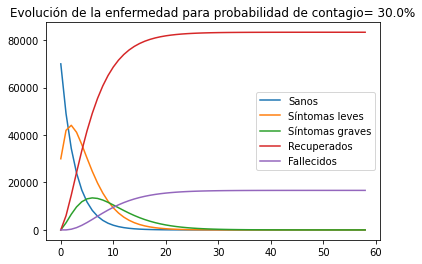

In [ ]:
#MK=markovCovid(POB=100000,SL=0.3,LG=0.10,LR=0.2,GR=0.1, GF=0.1,CAMAS=6000) 
DIA=60
MK=markovCovid(POB=100000,SL=0.3,LG=0.10,LR=0.2,GR=0.1, GF=0.1,CAMAS=6000) 
MK.modMarkovCovid(DIA)
MK.graficar()


### 1.3)  Resultados para la evolución de la enfermedad en la primera semana de análisis


In [ ]:
DIA=7
print(f'Al día {DIA} el estado de la enfermadad es :\n')
sanos=MK.resultadosSanos(DIA)
leves=MK.resultadosLeves(DIA)
graves=MK.resultadosGraves(DIA)
recuperados=MK.resultadosRecuperados(DIA)
fallecidos=MK.resultadosFallecidos(DIA)

print(f'Número de personas sanas           : {sanos:.0f}')
print(f'Número de personas enfermas leves  : {leves:.0f}')
print(f'Número de personas enfermas graves : {graves:.0f}')
print(f'Número de personas recuperadas     : {recuperados:.0f}')
print(f'Número de personas fallecidas      : {fallecidos:.0f}')

Al día 7 el estado de la enfermadad es :

Número de personas sanas           : 8235
Número de personas enfermas leves  : 24706
Número de personas enfermas graves : 13502
Número de personas recuperadas     : 49131
Número de personas fallecidas      : 4425


### 1.4)  Último día de la ventana de estudio: calcule la cantidad de individuos recuperados y fallecidos.

In [ ]:
#Parte 4
DIA=60
print(f'Al día {DIA} el estado de la enfermedad es :\n')

recuperados=MK.resultadosRecuperados(DIA)
fallecidos=MK.resultadosFallecidos(DIA)
print(f'Número de personas recuperadas     : {recuperados:.0f}')
print(f'Número de personas fallecidas      : {fallecidos:.0f}')

Al día 60 el estado de la enfermedad es :

Número de personas recuperadas     : 83333
Número de personas fallecidas      : 16666


<font color='green'>Fin actividad 1</font>

# <font color='green'>Actividad 2</font>

Escenario 2: Menor tasa de contagio

Considere que la tasa de contagio $s_l$ disminuye y tiene un valor de 0.05. Todas las otras probabilidades de transición se mantienen inalteradas con respecto al escenario 1. Considere una ventana de análisis de 60 días.

1. Ejecute el modelo epidemiológico con las nuevas condiciones iniciales.

2. Grafique la evolución del modelo para el escenario 2.

3. Compare los escenarios 1 y 2 en términos de la cantidad de personas fallecidas a los 30 y 60 días.

4. Considere que la capacidad total del sistema de salud es de 6.000 camas. Grafique los enfermos leves y graves para ambos escenarios en conjunto con la capacidad del sistema de salud. Comente los resultados.

5. Considerando que sólo los enfermos graves utilizan camas del sistema de salud, indique, para ambos escenarios, en qué día el sistema colapsa (existen más casos graves que camas disponibles).

6. Grafique la curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.

### 2.1)  Modelo epidemiológico con las nuevas condiciones iniciales 5% Cntagio.
$s_l=0.05$, $l_g=0.10$, $l_r=0.20$, $g_r=0.10$ y $g_f=0.10$.

In [ ]:
MK2=markovCovid(POB=100000,SL=0.05,LG=0.10,LR=0.2,GR=0.1, GF=0.1,CAMAS=6000) 

Probabilidades :
s_l=0.05
l_g=0.1
l_r=0.2
g_r=0.1
g_f=0.1

Matriz de transición
[[0.95 0.05 0.   0.   0.  ]
 [0.   0.7  0.2  0.1  0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.1  0.8  0.1 ]
 [0.   0.   0.   0.   1.  ]]


### 2.2)  Grafico la evolución del modelo para el escenario 2.

Probabilidades :
s_l=0.05
l_g=0.1
l_r=0.2
g_r=0.1
g_f=0.1

Matriz de transición
[[0.95 0.05 0.   0.   0.  ]
 [0.   0.7  0.2  0.1  0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.1  0.8  0.1 ]
 [0.   0.   0.   0.   1.  ]]
Dias = 60


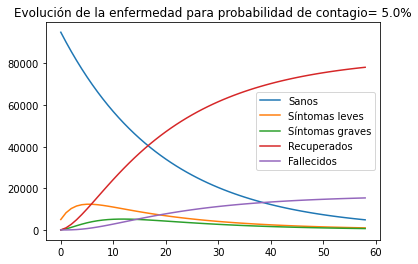

Al día 60 el estado de la enfermadad es :

Número de personas sanas           : 4607
Número de personas enfermas leves  : 921
Número de personas enfermas graves : 614
Número de personas recuperadas     : 78419
Número de personas fallecidas      : 15438




In [ ]:
DIA=60
MK2=markovCovid(POB=100000,SL=0.05,LG=0.10,LR=0.2,GR=0.1, GF=0.1,CAMAS=6000) 
MK2.modMarkovCovid(DIA)
MK2.graficar()

print(f'Al día {DIA} el estado de la enfermadad es :\n')
e2sanos=MK2.resultadosSanos(DIA)
e2leves=MK2.resultadosLeves(DIA)
e2graves=MK2.resultadosGraves(DIA)
e2recuperados=MK2.resultadosRecuperados(DIA)
e2fallecidos=MK2.resultadosFallecidos(DIA)

print(f'Número de personas sanas           : {e2sanos:.0f}')
print(f'Número de personas enfermas leves  : {e2leves:.0f}')
print(f'Número de personas enfermas graves : {e2graves:.0f}')
print(f'Número de personas recuperadas     : {e2recuperados:.0f}')
print(f'Número de personas fallecidas      : {e2fallecidos:.0f}')
print("\n")



##2.3) Escenarios 1 y 2 en términos de la cantidad de personas fallecidas a los 30 y 60 días

In [ ]:
DIA=30
e1fallecidos=MK.resultadosFallecidos(DIA)
e2fallecidos=MK2.resultadosFallecidos(DIA)

print(f'Número de personas fallecidas al {DIA}, escenario 1      : {e1fallecidos:.0f}')
print(f'Número de personas fallecidas al {DIA}, escenario 2      : {e2fallecidos:.0f}')
print("\n")

DIA=60
e1fallecidos=MK.resultadosFallecidos(DIA)
e2fallecidos=MK2.resultadosFallecidos(DIA)

print(f'Número de personas fallecidas al {DIA}, escenario 1      : {e1fallecidos:.0f}')
print(f'Número de personas fallecidas al {DIA}, escenario 2      : {e2fallecidos:.0f}')


Número de personas fallecidas al 30, escenario 1      : 16494
Número de personas fallecidas al 30, escenario 2      : 10963


Número de personas fallecidas al 60, escenario 1      : 16666
Número de personas fallecidas al 60, escenario 2      : 15438


##2.4) Considere que la capacidad total del sistema de salud es de 6.000 camas. Grafique los enfermos leves y graves para ambos escenarios en conjunto con la capacidad del sistema de salud. Comente los resultados

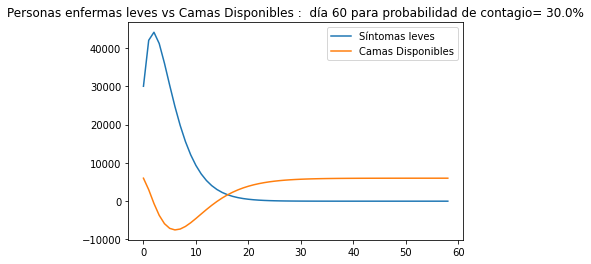

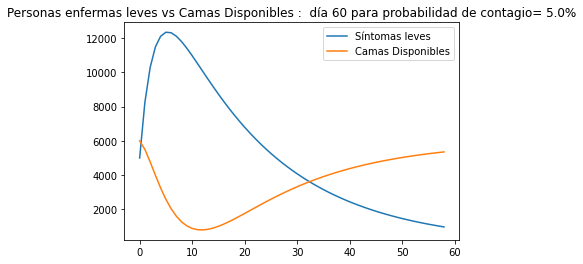

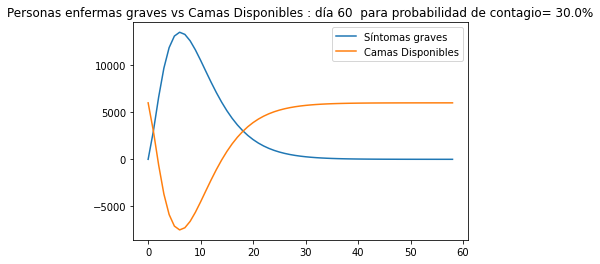

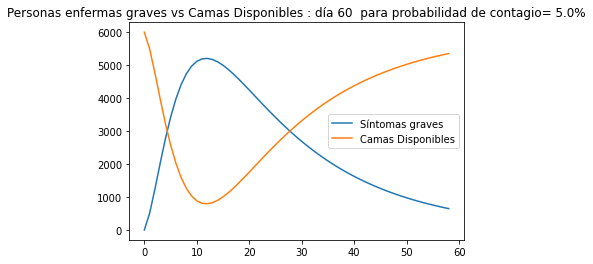

In [ ]:
MK.graficoLeves(60)
MK2.graficoLeves(60)

MK.graficoGraves(60)
MK2.graficoGraves(60)

#En los resultados se puede ver que tanto para enfermos graves como Leves, cuando la tasa de contagio es mayor
#Se nota un incremento de estos en un periodo de tiempo más temprano 
#Las camas disponibles son utilizadas solo en casos graves y estas se ven colapsadas antes a una mayor tasa de contagio
#Pero también se denota que se liberan antes ya que fallece gente en un periodo más cercano


##2.5) Considerando que sólo los enfermos graves utilizan camas del sistema de salud, indique, para ambos escenarios, en qué día el sistema colapsa (existen más casos graves que camas disponibles).

In [ ]:
MK.DiaColapso()
MK2.DiaColapso()

Camas Disponibles, el sistema para un Contagio 30.0% colapsa en el dia : 3
Camas Disponibles, el sistema para un Contagio 5.0% No colapsa


##2.6) Grafico curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.

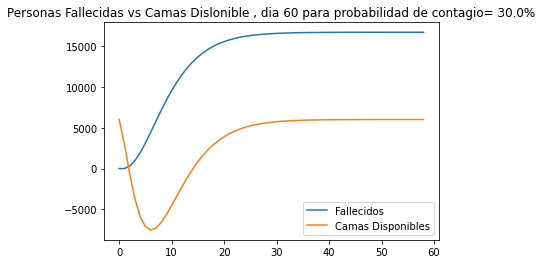

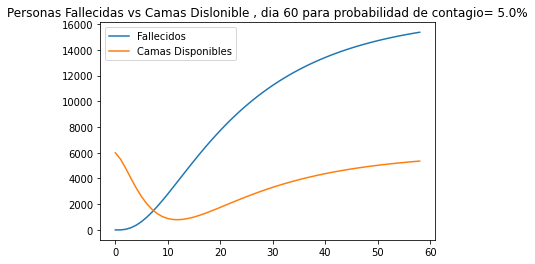

In [ ]:
MK.graficoFallecidos(60)
MK2.graficoFallecidos(60)

<font color='green'>Fin actividad 2</font>